# Logistic Regression 
Optimization objective : 
\begin{align*}
\text{minimize}_{\theta \in \mathbb{R}^d} \quad {1 \over N} \sum_{i = 1}^N \log(1 + \exp(-Y_i X_i^\top \theta))
\end{align*}

Suppose that we are using a stochastic gradient descent algorithm. Then, the gradient of the loss function is obviously 
$$
-Y_i X_i {\exp(-Y_i X_i^\top\theta) \over {1 + \exp(-Y_i X_i^\top\theta)}}.
$$
Please make sure that you understand this. 

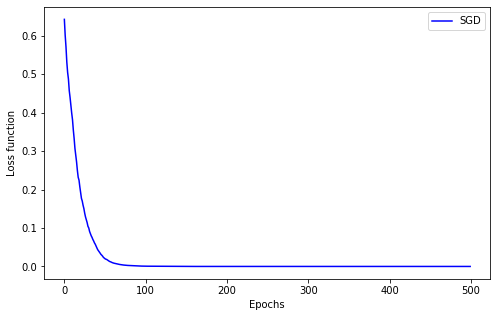

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from math import exp, log

#######################################
### STEP 1 : Sample data generation ###
#######################################
N, d = 30, 20
np.random.seed(0)
X = np.random.randn(N, d)
Y = 2 * np.random.randint(2, size = N) - 1


###################################
### STEP 2 : SGD implementation ###
###################################
theta = np.random.randn(d) * 1e-2
K = 500     # number of epochs
alpha = 0.0003
f_val = []

for iter_ in range(K * N) : 
    idx = np.random.randint(N)

    temp = np.exp(-Y[idx] * X[idx, :].T * theta)
    d_theta = (temp / (1 + temp)) * (-Y[idx] * X[idx, :])
    theta -= alpha * d_theta

    if iter_ % N == 0 : 
        f_val.append(np.log(1 + np.exp(-Y.T @ X @ theta)))    

plt.figure(figsize = (8, 5))
plt.plot(np.arange(K), f_val, color = "blue", label = "SGD")
plt.xlabel("Epochs")
plt.ylabel('Loss function')
plt.legend()
plt.show()

# 2-Layer Neural Networks
Our goal is to approximate $f_\theta$ to $f_{\text{true}} := x^2 \cos(3x) - 2x \sin (3x)$.

We use the MSE error as an optimization objective, and our model is given by 
\begin{align*}
f_\theta(x) = \mu^\top \sigma(ax + b)
\end{align*}
where $\mu, a, b \in \mathbb{R}^d$ and $\sigma : \mathbb{R} \rightarrow \mathbb{R}$ is a sigmoid function. 

To clarify, sigmoid function is defined by 
\begin{align*}
\sigma(x) = {1 \over 1 + e^{-x}}.
\end{align*}

Then, we have that 
\begin{align*}
{\partial\mathcal{L} \over \partial f_\theta(x)} = f_\theta(x) - f_{\text{true}}(x).
\end{align*}

Note that 
\begin{align*}
&\nabla_\mu f_\theta(x) = \sigma(ax + b), \\
&\nabla_a f_\theta(x) = (\sigma'(ax + b)\odot \mu)x  = \text{diag}(\sigma'(ax + b))ux, 
\\&\nabla_b f_\theta(x) = (\sigma'(ax + b))\odot \mu) = \text{
diag}(\sigma'(ax + b))u. 
\end{align*}


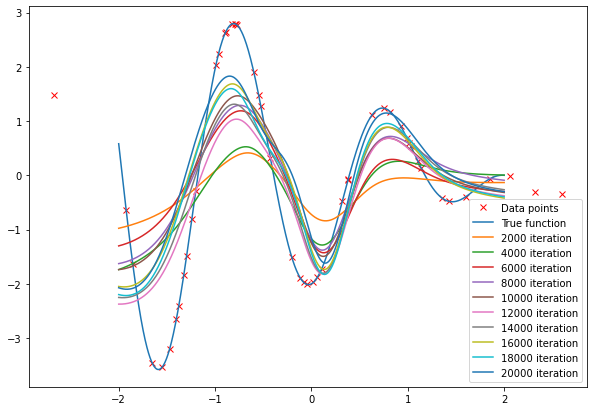

In [39]:
import numpy as np
import matplotlib.pyplot as plt

##########################
### STEP 1 : functions ###
##########################
def f_true(x) : 
    #return (x ** 2) * np.cos(3* x) - 2 * x * np.sin(3 * x) 
    return (x - 2) * np.cos(4 * x)
def sigmoid(x) : 
    return 1 / (1 + np.exp(-x))

def sigmoid_prime(x) :
    return sigmoid(x) * (1 - sigmoid(x))


#######################################
### STEP 2 : Sample data generation ###
#######################################
N, d = 50, 50
alpha = 0.003
K = 20000
np.random.seed(0)

a0 = np.random.normal(loc = 0.0, scale = 4.0, size = d)
b0 = np.random.normal(loc = 0.0, scale = 4.0, size = d)
u0 = np.random.normal(loc = 0.0, scale = 0.05, size = d)
theta = np.concatenate((a0, b0, u0))        #### Take a look here! 

X = np.random.normal(loc = 0.0, scale = 1.2, size = N)
Y = f_true(X)

f_val = []

xx = np.linspace(-2, 2, 1024)
plt.figure(figsize = (10, 7))
plt.plot(X, f_true(X), 'rx', label ='Data points')
plt.plot(xx, f_true(xx), label = 'True function')

######################################
### STEP 2.5 : Forward propagation ###
######################################
def f(theta, x) : 
    return np.sum(theta[2*d : 3*d] * sigmoid(theta[0:d] * np.reshape(x, (-1, 1)) + theta[d:2*d]), axis = 1)


#################################
### STEP 3 : Gradient descent ###
#################################
for iter_ in range(K) : 
    idx = np.random.randint(N)

    f_val = f(theta, X[idx])        # Take a look here! 

    diff_f = f_val - f_true(X[idx])

    diff_a = sigmoid_prime(a0 * X[idx] + b0) * u0
    diff_b = sigmoid_prime(a0 * X[idx] + b0)
    diff_u = sigmoid(a0 * X[idx] + b0)

    theta_prime = np.concatenate((diff_a, diff_b, diff_u)) * diff_f

    theta -= alpha * theta_prime


    if (iter_ + 1) % 2000 == 0 : 
        plt.plot(xx, f(theta, xx), label = f'{iter_ + 1} iteration')

plt.legend()
plt.show()

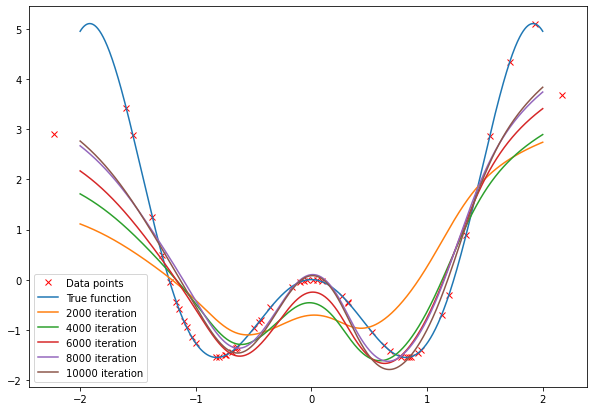

In [42]:
import numpy as np
import matplotlib.pyplot as plt

##########################
### STEP 1 : functions ###
##########################
def f_true(x) : 
    return (x ** 2) * np.cos(3* x) - 2 * x * np.sin(3 * x) 
    
def sigmoid(x) : 
    return 1 / (1 + np.exp(-x))

def sigmoid_prime(x) :
    return sigmoid(x) * (1 - sigmoid(x))


#######################################
### STEP 2 : Sample data generation ###
#######################################
N, d = 50, 50
alpha = 0.005
K = 10000
np.random.seed(0)

a0 = np.random.normal(loc = 0.0, scale = 4.0, size = d)
b0 = np.random.normal(loc = 0.0, scale = 4.0, size = d)
u0 = np.random.normal(loc = 0.0, scale = 0.1, size = d)
theta = np.concatenate((a0, b0, u0))        #### Take a look here! 

X = np.random.normal(loc = 0.0, scale = 1.0, size = N)
Y = f_true(X)

f_val = []

xx = np.linspace(-2, 2, 1024)
plt.figure(figsize = (10, 7))
plt.plot(X, f_true(X), 'rx', label ='Data points')
plt.plot(xx, f_true(xx), label = 'True function')

######################################
### STEP 2.5 : Forward propagation ###
######################################
def f(theta, x) : 
    return np.sum(theta[2*d : 3*d] * sigmoid(theta[0:d] * np.reshape(x, (-1, 1)) + theta[d:2*d]), axis = 1)


#################################
### STEP 3 : Gradient descent ###
#################################
for iter_ in range(K) : 
    idx = np.random.randint(N)

    f_val = f(theta, X[idx])        # Take a look here! 

    diff_f = f_val - f_true(X[idx])

    diff_a = sigmoid_prime(a0 * X[idx] + b0) * u0
    diff_b = sigmoid_prime(a0 * X[idx] + b0)
    diff_u = sigmoid(a0 * X[idx] + b0)

    theta_prime = np.concatenate((diff_a, diff_b, diff_u)) * diff_f

    theta -= alpha * theta_prime


    if (iter_ + 1) % 2000 == 0 : 
        plt.plot(xx, f(theta, xx), label = f'{iter_ + 1} iteration')

plt.legend()
plt.show()